In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(train_data, train_label), (test_data, test_label) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
train_data.shape

(50000, 32, 32, 3)

In [ ]:
train_data[0].shape

(32, 32, 3)

In [ ]:
train_label.shape

(50000, 1)

In [ ]:
train_label[:5].shape

(5, 1)

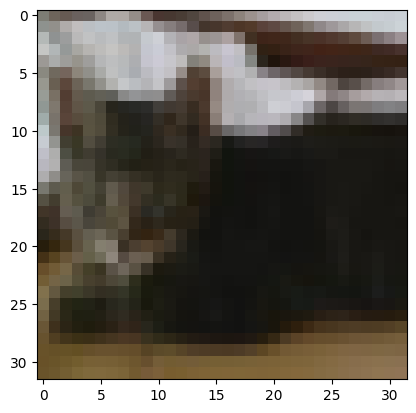

In [ ]:
plt.imshow(train_data[9])

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog ', 'frog ', 'horse ', 'ship ', 'truck']

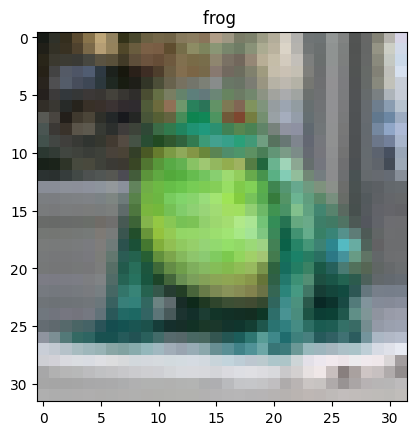

In [ ]:
plt.imshow(train_data[19])
for i in train_label[19]:
  plt.title(class_names[i])

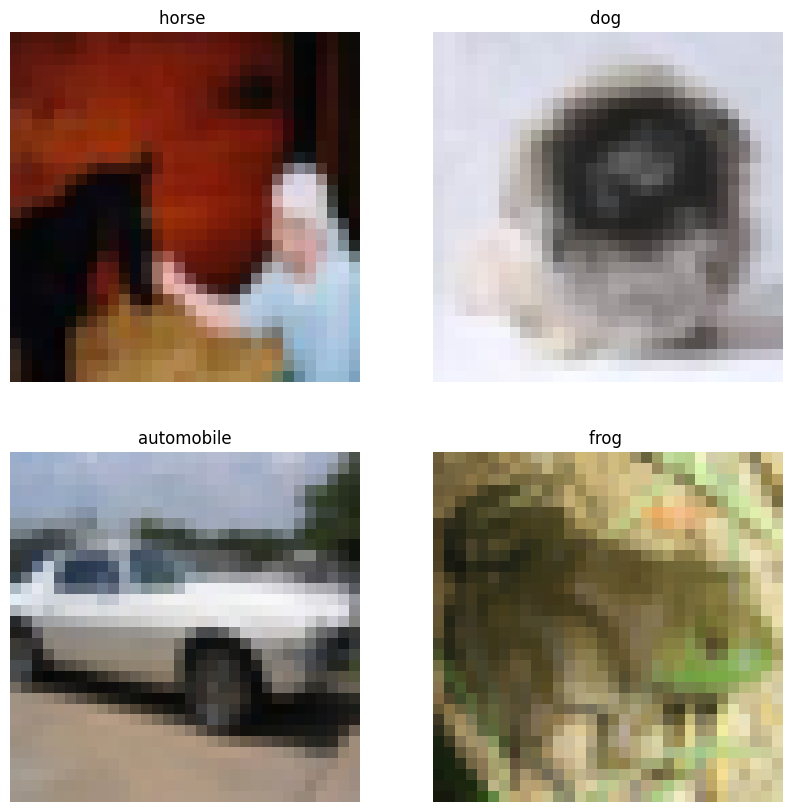

In [ ]:
import random
plt.figure(figsize=(10, 10))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  for i in train_label[rand_index]:
    plt.title(class_names[i])
  plt.axis(False)

In [ ]:
train_data = train_data / 255.
test_data = test_data / 255.

In [ ]:
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# fit the model
model.fit(train_data,
          train_label,
          epochs=200,
          validation_data=(test_data, test_label))

Epoch 1/200
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8557 - accuracy: 0.3289 - val_loss: 1.7351 - val_accuracy: 0.3829
Epoch 2/200
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6987 - accuracy: 0.3924 - val_loss: 1.6722 - val_accuracy: 0.3948
Epoch 3/200
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6336 - accuracy: 0.4159 - val_loss: 1.6028 - val_accuracy: 0.4345
Epoch 4/200
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5838 - accuracy: 0.4323 - val_loss: 1.5922 - val_accuracy: 0.4319
Epoch 5/200
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5523 - accuracy: 0.4424 - val_loss: 1.5484 - val_accuracy: 0.4490
Epoch 6/200
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5269 - accuracy: 0.4516 - val_loss: 1.5313 - val_accuracy: 0.4558
Epoch 7/200
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5063 - accuracy: 0.4591 - val_loss: 1.5544 -

In [ ]:
def plot_random_imeg(model, test_data, classes=class_names):
  y_pred = model.predict(test_data)
  rand_index = random.randint(0, len(y_pred))
  plt.imshow(test_data[rand_index])
  predict_labels = class_names[y_pred[rand_index].argmax()]
  true_label = class_names[test_label[rand_index][0]]

  if true_label == predict_labels:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(predict_labels,
                                                   100*tf.reduce_max(y_pred),
                                                   true_label),
             color=color)


In [ ]:
plot_random_imeg(model=model,
                 test_data=test_data)